# AHmed Samy Ahmed

# Most familiar gradient descent optimization techniques
# Momentum , NaG , Adagrad , RMSprop ,and ADAM

in this Notebook , i will develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Momentum , NaG , Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.random.uniform(1,20,size=200)


In [3]:
y=-2*x+1

#### Plot your data points. 

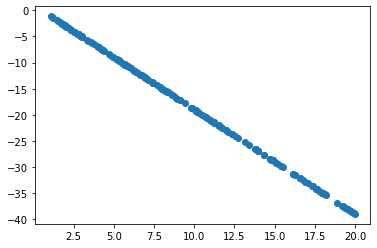

In [4]:
plt.scatter(x,y)

# Momentum :


#### γ takes values between 0 and 1.

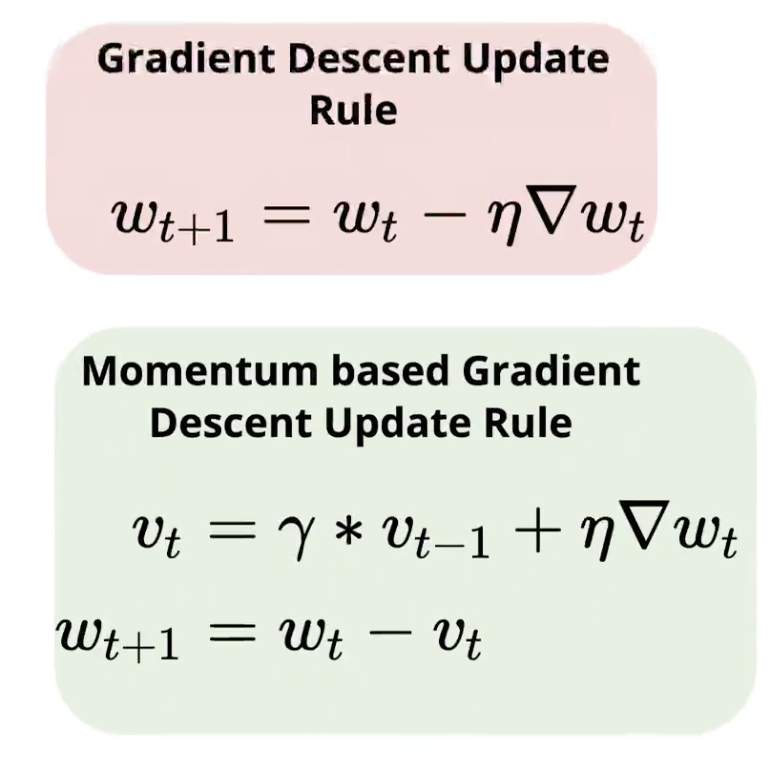

In [5]:
def Momentum_GD(x,y,ph,gam,max_iter):
    theta0 = 0.0
    theta1 = 0.0
    alpha = ph
    gamma= gam
    v0=0.0
    v1=0.0
    m=len(x)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_pred = theta0 + theta1 * x
        y_predict_list.append(y_pred)
        
        grd0 = (1/m) * np.sum(y_pred - y)
        grd1 = (1/m) * np.sum((y_pred - y) * x)
        
        v0= gamma*v0 + alpha*grd0
        v1= gamma*v1 + alpha*grd1
        
        theta0 = theta0 - v0
        theta0_list.append(theta0)
        
        theta1 = theta1 - v1
        theta1_list.append(theta1)
        loss_func=(1/(2*m))*sum((y_pred-y)**2)
        loss_list.append(loss_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred

In [6]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=Momentum_GD(x,y,0.001,0.9,300)

In [7]:
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 0.4507376023560185
Final theta1 -1.9570284466973877


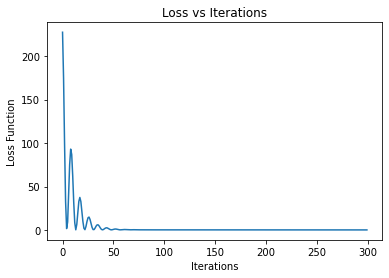

In [8]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

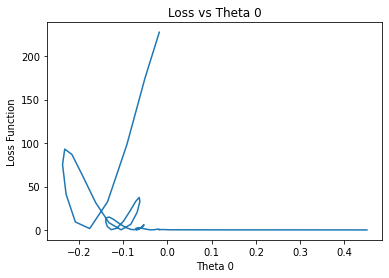

In [9]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

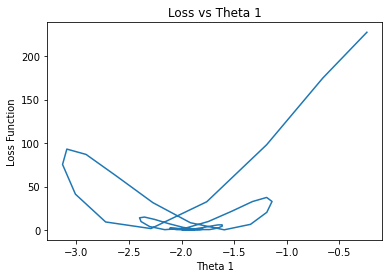

In [10]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

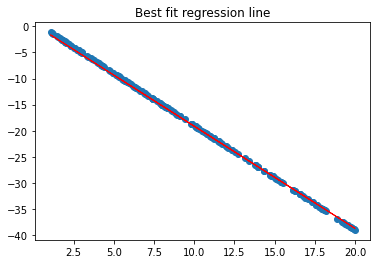

In [11]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [12]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.938 %


# NaG : 


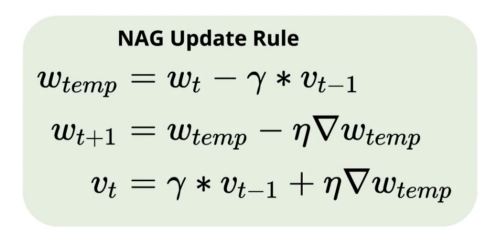

In [13]:
def NaG_GD(x,y,ph,gam,max_iter):
    theta0 = 0.0
    theta1 = 0.0
    alpha = ph
    gamma= gam
    v0=0.0
    v1=0.0
    y_pred = 0
    m=len(x)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        
        theta0_temp=theta0-gamma*v0 # here we moved to temp theta0 just using momentum
        theta1_temp=theta1-gamma*v1 # here we moved to temp theta1 just using momentum
        
        y_pred = theta0_temp + theta1_temp * x
        
        grd0 = 2 * np.sum(y_pred - y)
        grd1 = 2 * np.sum((y_pred - y) * x)
        
        v0= gamma*v0 + alpha*grd0
        v1= gamma*v1 + alpha*grd1
        
        theta0 = theta0 - v0
        theta0_list.append(theta0)
        
        theta1 = theta1 - v1
        theta1_list.append(theta1)
        
        y_pred = theta0 + theta1 * x # the actual prediction of y
        y_predict_list.append(y_pred)
        
        loss_func=(1/(2*m))*sum((y_pred-y)**2)
        loss_list.append(loss_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred

In [14]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=NaG_GD(x,y,0.0000003,0.9,1000)

In [15]:
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 0.14472247415896866
Final theta1 -1.9330875528314742


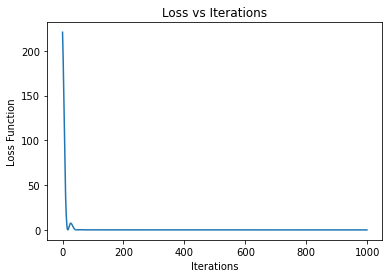

In [16]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

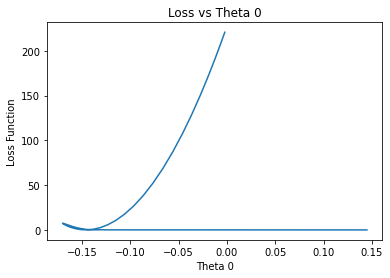

In [17]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

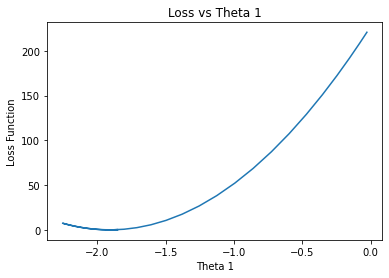

In [18]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

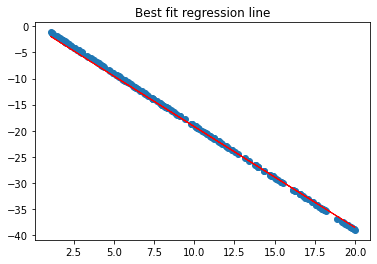

In [19]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [20]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.851 %


## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

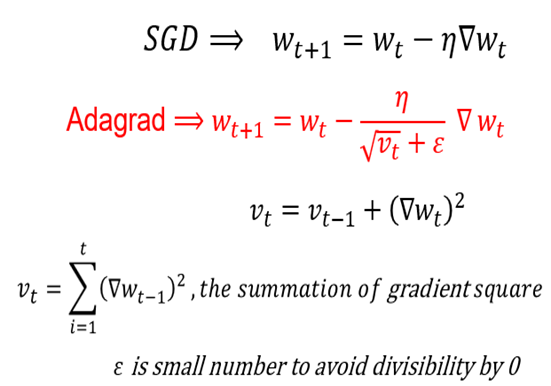

In [21]:
def adagrad_GD(x,y,ph,eps,max_iter):
    theta0 = 0.0
    theta1 = 0.0
    alpha = ph
    epsilon=eps
    v0=0.0
    v1=0.0
    m=len(x)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_pred = theta0 + theta1 * x
        y_predict_list.append(y_pred)
        
        grd0 = (1/m) * np.sum(y_pred - y)
        grd1 = (1/m) * np.sum((y_pred - y) * x)
        
        v0=v0+grd0**2
        v1=v1+grd1**2
        
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epsilon)) * grd0
        theta0_list.append(theta0)
        
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epsilon)) * grd1
        theta1_list.append(theta1)
        loss_func=(1/(2*m))*sum((y_pred-y)**2)
        loss_list.append(loss_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred

In [22]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=adagrad_GD(x,y,0.1,1e-8,1000)


In [23]:
print('Final theta0',theta0)
print('Final theta1',theta1)


Final theta0 -1.205301718863138
Final theta1 -1.8233316721077713


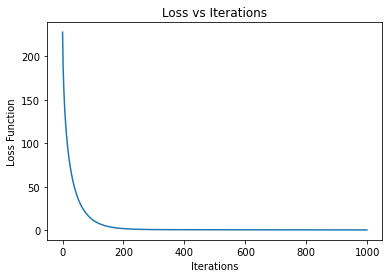

In [24]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

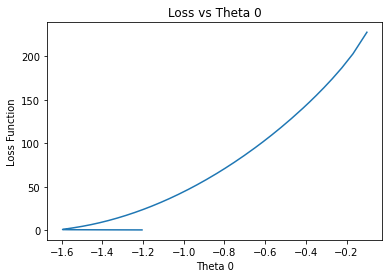

In [25]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

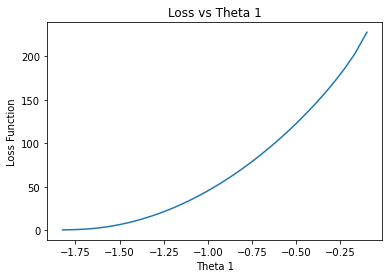

In [26]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

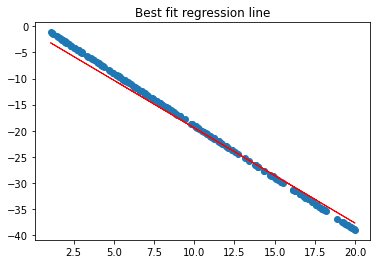

In [27]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [28]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.01 %


# Trying another value of alpha

In [29]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=adagrad_GD(x,y,0.3,1e-8,1000)


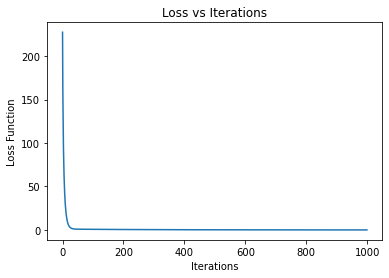

In [30]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

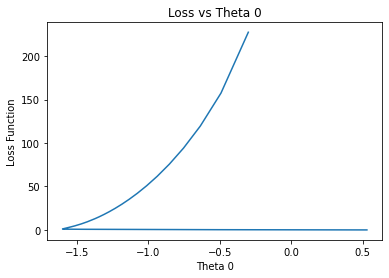

In [31]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

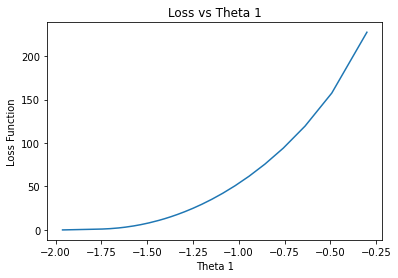

In [32]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

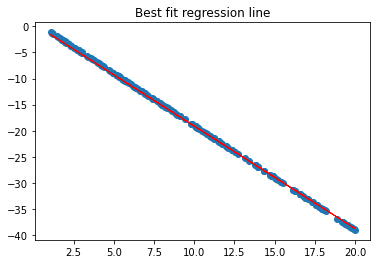

In [33]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [34]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.955 %


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

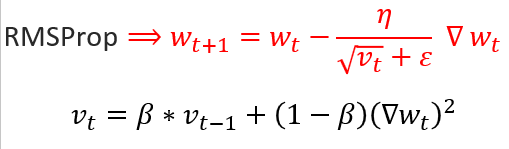

In [35]:
def RMSprop_GD(x,y,ph,eps,be,max_iter):
    theta0 = 0.0
    theta1 = 0.0
    alpha = ph
    epsilon=eps
    beta=be
    v0=0.0
    v1=0.0
    m=len(x)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_pred = theta0 + theta1 * x
        y_predict_list.append(y_pred)
        
        grd0 = (1/m) * np.sum(y_pred - y)
        grd1 = (1/m) * np.sum((y_pred - y) * x)
        
        v0= beta*v0 + (1-beta)*grd0**2
        v1= beta*v1 + (1-beta)*grd1**2
        

        theta0 = theta0 - (alpha/(np.sqrt(v0)+epsilon)) * grd0
        theta0_list.append(theta0)
        
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epsilon)) * grd1
        theta1_list.append(theta1)
        loss_func=(1/(2*m))*sum((y_pred-y)**2)
        loss_list.append(loss_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred

In [36]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=RMSprop_GD(x,y,0.01,1e-8,0.9,1000)

In [37]:
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 1.0049999990078773
Final theta1 -1.9950000000713526


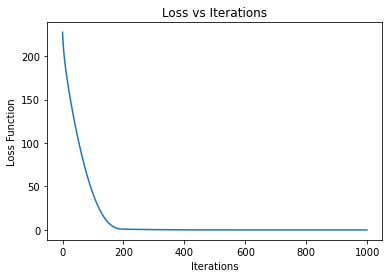

In [38]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

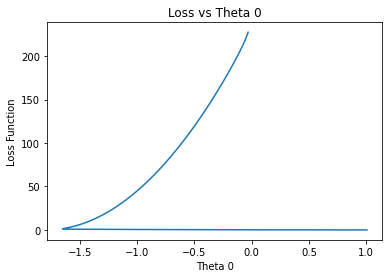

In [39]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

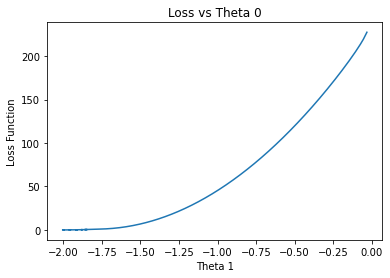

In [40]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

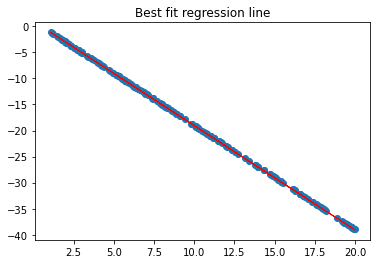

In [41]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [42]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.997 %


# Trying another value of alpha and Beta

In [43]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=RMSprop_GD(x,y,0.1,1e-8,0.95,1000)
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 0.9500000009709876
Final theta1 -2.0499999998959275


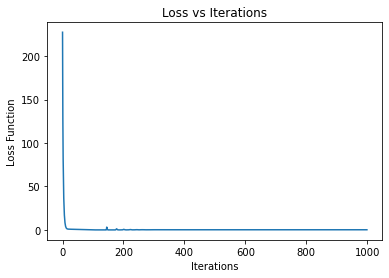

In [44]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

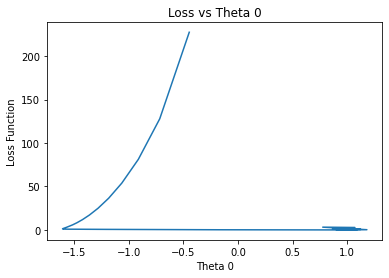

In [45]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

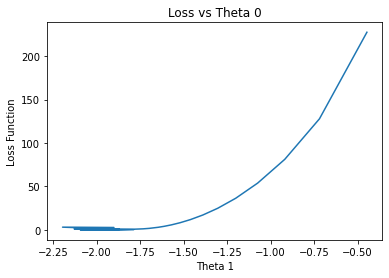

In [46]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

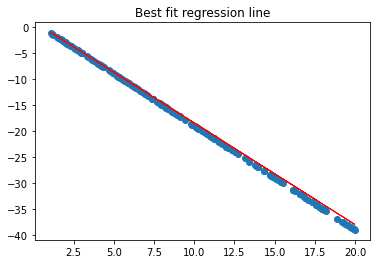

In [47]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [48]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.708 %


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

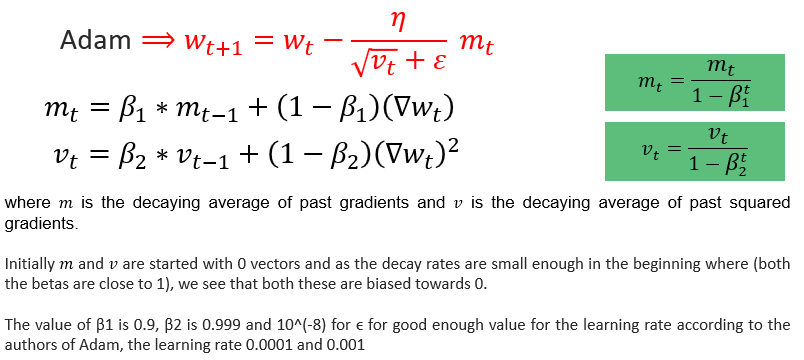

In [49]:
def ADAM_GD(x,y,ph,eps,be1,be2,max_iter):
    theta0 = 0.0
    theta1 = 0.0
    alpha = ph
    epsilon=eps
    beta1=be1
    beta2=be2
    m0=0.0
    m1=0.0
    v0=0.0
    v1=0.0
    m=len(x)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_pred = theta0 + theta1 * x
        y_predict_list.append(y_pred)
        
        grd0 = (1/m) * np.sum(y_pred - y)
        grd1 = (1/m) * np.sum((y_pred - y) * x)
        
        m0=beta1*m0+(1-beta1)*grd0
        m1=beta1*m1+(1-beta1)*grd1
        
        m0=m0/(1-pow(beta1,i+1))
        m1=m1/(1-pow(beta1,i+1))
        
        v0= beta2*v0 + (1-beta2)*grd0**2
        v1= beta2*v1 + (1-beta2)*grd1**2
        
        v0=v0/(1-pow(beta2,i+1))
        v1=v1/(1-pow(beta2,i+1))
        

        theta0 = theta0 - (alpha/(np.sqrt(v0)+epsilon)) * m0
        theta0_list.append(theta0)
        
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epsilon)) * m1
        theta1_list.append(theta1)
        loss_func=(1/(2*m))*sum((y_pred-y)**2)
        loss_list.append(loss_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred

In [50]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=ADAM_GD(x,y,0.1,1e-8,0.9,0.95,1000)

In [51]:
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 1.0037778204977355
Final theta1 -1.9962221779017606


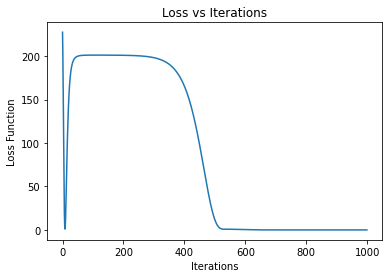

In [52]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

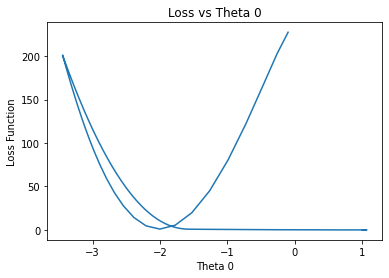

In [53]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

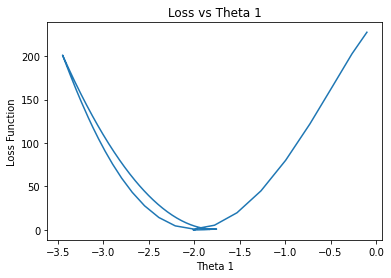

In [54]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

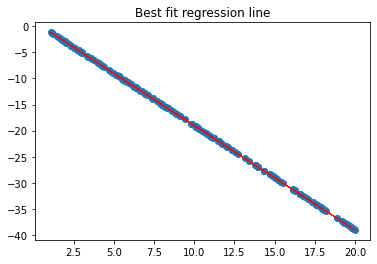

In [55]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [56]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  99.999 %


# Trying another values of alpha ,Beta1 , and Beta2

In [57]:
theta0_list,theta1_list,loss_list,y_predict_list,theta0,theta1,y_pred=ADAM_GD(x,y,0.01,1e-8,0.8,0.9,1000)
print('Final theta0',theta0)
print('Final theta1',theta1)

Final theta0 1.0007710487455335
Final theta1 -1.99922895012319


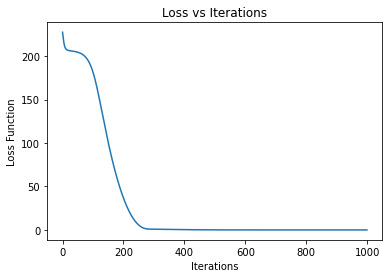

In [58]:
#loss function
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

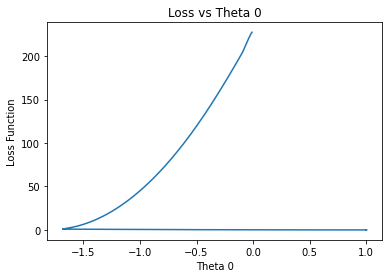

In [59]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

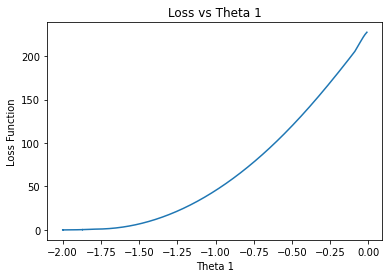

In [60]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

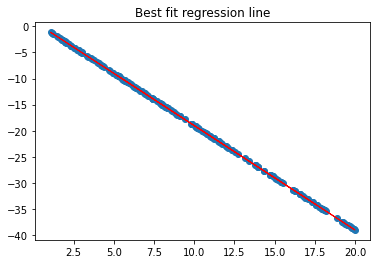

In [61]:
# Before  
plt.scatter(x, y,label="predicted Data")

# After 
plt.plot(x, y_pred,label="Model", color='r',linewidth=1)
plt.title("Best fit regression line")
plt.show()

In [62]:
#getting r2 
y_mean = np.mean(y)
S_total = np.sum((y - y_mean)**2)
S_result = np.sum((y - y_pred)**2)
R2 = 1 - (S_result / S_total)
print('Accuracy output is : ',round(R2*100,3),'%')

Accuracy output is :  100.0 %


## Congratulations 
![image.png](attachment:image.png)

# Thanks for following my code